In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm, trange
import time
import datetime
from datetime import datetime, time
import pickle
import os

DIR = '/content/drive/MyDrive/sahb_project'
PIR_DATA_PATH = os.path.join(DIR, 'pir_data') # from RPI pull with ```pscp -pw 5p3KTWzfhEqq pi@172.27.128.52:/home/pi/PIR_sensor/data/*.* C:/Users/zorai/Downloads/data_solar_EH/pir_data```
SOLAR_DATA_PATH = os.path.join(DIR, 'solar_eh_data')

### LLL-book Setup

In [ ]:
!git clone https://github.com/wanghalan/lll-book.git

fatal: destination path 'lll-book' already exists and is not an empty directory.


In [ ]:
!mv /content/lll-book/* /content/

mv: cannot stat '/content/lll-book/*': No such file or directory


In [ ]:
!rm requirements.txt
!echo -e "arrow==1.2.3\ncharset-normalizer==2.1.1\ncolorama==0.4.5\ncontourpy==1.0.5\ncycler==0.11.0\nfonttools==4.37.3\ngrafana==0.0.1\nidna==3.4\ninfluxdb==5.3.1\nkiwisolver==1.4.4\nmsgpack==1.0.4\npackaging==21.3\npyparsing==3.0.9\npython-dateutil==2.8.2\npython-decouple==3.6\npytz==2022.2.1\nrequests==2.28.1\ntqdm==4.64.1\nurllib3==1.26.12" >> "requirements.txt"

In [ ]:
!pip install -r requirements.txt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:

os.environ['INFLUX_USER'] = 'livinglab02'
os.environ['INFLUX_PW'] = 'yi4lae2Mohpho7Thoon2ag4soh8voW5teYee7i'
os.environ['INFLUX_HOST'] = 'influx.linklab.virginia.edu'

In [ ]:
import utility as util

df = pd.read_csv('book_with_grids.csv')
df

,device_id,location_general,type,max_heartbeat_str,description,fields,notes,x,y,z,grid
0,0506d2cd,linklab,light_level,30min,"6.51,29.29,3.1","Illumination_lx,Range select,Supply voltage_V,...",NaN,6.51,29.29,3.10,2
1,awair-3242,linklab,awair_element,10s,"20.53,28.82,0.38","Humidity_%,Temperature_°C,awair_score,co2_ppm,...",NaN,20.53,28.82,0.38,6
2,018a26ba,linklab,temp_humid,15min,"18.86,28.82,1.1","Temperature_°C,Humidity_%,T-Sensor,rssi",NaN,18.86,28.82,1.10,6
3,018a315a,linklab,temp_humid,15min,"44.89,28.82,1.1","Temperature_°C,Humidity_%,T-Sensor,rssi",NaN,44.89,28.82,1.10,14
4,0506221e,linklab,light_level,30min,"57.42,28.16,3.1","Illumination_lx,Range select,Supply voltage_V,...",NaN,57.42,28.16,3.10,18
...,...,...,...,...,...,...,...,...,...,...,...
135,70886b1235d4,linklab,awair_element,10s,NaN,"Humidity_%,Temperature_°C,awair_score,co2_ppm,...",269 Olsson,NaN,NaN,NaN,166
136,70886b12335b,linklab,awair_element,10s,NaN,"Humidity_%,Temperature_°C,awair_score,co2_ppm,...",C211 Olsson,NaN,NaN,NaN,71
137,70886b123735,linklab,awair_element,10s,NaN,"Humidity_%,Temperature_°C,awair_score,co2_ppm,...",221 Olsson,NaN,NaN,NaN,15
138,70886b1277ca,linklab,awair_element,10s,NaN,"Humidity_%,Temperature_°C,awair_score,co2_ppm,...",253 Olsson,NaN,NaN,NaN,195


In [ ]:
df2 = pd.read_csv('book_with_grids_combined.csv')
df2

,device_id,location_general,type,max_heartbeat_str,description,fields,notes,x,y,z,grid
0,0506d2cd,linklab,light_level,30min,"6.51,29.29,3.1","Illumination_lx,Range select,Supply voltage_V,...",NaN,6.51,29.29,3.10,2
1,awair-3242,linklab,awair_element,10s,"20.53,28.82,0.38","Humidity_%,Temperature_°C,awair_score,co2_ppm,...",NaN,20.53,28.82,0.38,6
2,018a26ba,linklab,temp_humid,15min,"18.86,28.82,1.1","Temperature_°C,Humidity_%,T-Sensor,rssi",NaN,18.86,28.82,1.10,6
3,018a315a,linklab,temp_humid,15min,"44.89,28.82,1.1","Temperature_°C,Humidity_%,T-Sensor,rssi",NaN,44.89,28.82,1.10,14
4,0506221e,linklab,light_level,30min,"57.42,28.16,3.1","Illumination_lx,Range select,Supply voltage_V,...",NaN,57.42,28.16,3.10,18
...,...,...,...,...,...,...,...,...,...,...,...
149,70886b126976,linklab,awair_omni,10s,NaN,"score,temp,humid,co2,voc,pm25,lux,spl_a,mac,co...",Link Lab NE 46,NaN,NaN,NaN,NaN
150,70886b1232f6,linklab,awair_omni,10s,NaN,"score,temp,humid,co2,voc,pm25,lux,spl_a,mac,co...",Link Lab NE 28,NaN,NaN,NaN,NaN
151,70886b12532b,linklab,awair_omni,10s,NaN,"score,temp,humid,co2,voc,pm25,lux,spl_a,mac,co...",Link Lab - NE 8,NaN,NaN,NaN,NaN
152,70886b1277ca,linklab,awair_omni,10s,NaN,"score,temp,humid,co2,voc,pm25,lux,spl_a,mac,co...",253 Olsson,NaN,NaN,NaN,NaN


In [ ]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


def preprocess_tdf(df, resamp=True, resamp_rule='1T'):
    # REQ_ATTRIB = ['time','value','description','device_id','location_specific']
    REQ_ATTRIB = ['time','value']

    df = df[REQ_ATTRIB]
        
    df = df.set_index('time')
    
    df = df.dropna()

    if resamp:
        if len(REQ_ATTRIB) == 2:
            df = df.resample(resamp_rule).agg({'value':'mean'})
        else:
            df = df.resample(resamp_rule).agg({'value':'mean','description':'first','location_specific':'first','device_id':'first'})
        # df = df.dropna()

    # get weekdays only
    df = df.reset_index()
    df['weekday']  = df['time'].dt.dayofweek
    # df = df.loc[df['weekday'] < 5]
    
    if resamp_rule == '1H':
        df['hour'] = df['time'].dt.time
        df['hour_num'] = df['time'].dt.hour

    # remove holidays
    df['date'] = df['time'].dt.date.astype('datetime64')
    cal = calendar()
    holidays = cal.holidays(start=df['date'].min(), end=df['date'].max())
    df['holidays'] = df['date'].isin(holidays)
    # df = df.loc[df['holidays']==False]

    # df['date'] = df['date'].astype('str')

    # operational hours only
    df['daytime']= (df['time'].dt.time <= time(19,0,0)) & (df['time'].dt.time >= time(6,0,0))
    # df = df.loc[df['daytime']==True]

    df = df.set_index('time')
    

    print(df.shape)
    return df

In [ ]:
df_awair = df[df['type']=='awair_element']
df_awair['fields'].unique()

array(['Humidity_%,Temperature_°C,awair_score,co2_ppm,pm2.5_μg/m3,voc_ppb',
       'Humidity_%,Temperature_°C,awair_score,co2_ppm,pm2.5_μg/m3,voc_ppb,Illumination_lx,spl_a'],
      dtype=object)

In [ ]:
df2_awair = df2[df2['type']=='awair_element']
df2_awair['fields'].unique()

array(['Humidity_%,Temperature_°C,awair_score,co2_ppm,pm2.5_μg/m3,voc_ppb'],
      dtype=object)

In [ ]:
df_light_217 = df[df['device_id']=='050621c6']
df_light_printer = df[df['device_id']=='05060dd8']
df_noise_217 = df[df['device_id']=='70886b123507']
df_noise_printer = df[df['device_id']=='awair-3390']

df_awair['fields'].unique()


'''
Light sensors:
050621c6 - Room 217
05060dd8 - Printer room

Noise/motion Sensor (Awair):
70886b123507 -Room 217
awair-3390 - Printer Room
'''
df_light_217.shape, df_noise_217.shape, df_light_printer.shape, df_noise_printer.shape

((1, 11), (1, 11), (1, 11), (1, 11))

In [ ]:
df_light_printer

,device_id,location_general,type,max_heartbeat_str,description,fields,notes,x,y,z,grid
43,05060dd8,linklab,light_level,30min,"48.61,15.04,3.1","Illumination_lx,Range select,Supply voltage_V,...",NaN,48.61,15.04,3.1,115


In [ ]:
df_noise_printer

,device_id,location_general,type,max_heartbeat_str,description,fields,notes,x,y,z,grid
44,awair-3390,linklab,awair_element,10s,"48.49,13.45,0.38","Humidity_%,Temperature_°C,awair_score,co2_ppm,...",NaN,48.49,13.45,0.38,115


In [ ]:
df_noise_printer.fields.values

array(['Humidity_%,Temperature_°C,awair_score,co2_ppm,pm2.5_μg/m3,voc_ppb'],
      dtype=object)

In [ ]:
df_noise_217.fields.values

array(['Humidity_%,Temperature_°C,awair_score,co2_ppm,pm2.5_μg/m3,voc_ppb,Illumination_lx,spl_a'],
      dtype=object)

In [ ]:
list(df_noise_printer['device_id'])

['awair-3390']

In [ ]:
start= datetime(2022,10,27) 
end= datetime(2022,11,24)

df_printer_co2 = util.get_lfdf('co2_ppm', start, end, list(df_noise_printer['device_id']))
print(df_printer_co2)
df_printer_co2 = preprocess_tdf(df_printer_co2, resamp=False)

Retrieving client for: gateway-generic
start_time: 2022-10-27 00:00:00
end_time: 2022-11-24 00:00:00


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'influx.linklab.virginia.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


                            time     0     1     2     3 awair_device_uuid  \
0      2022-10-26 20:00:08-04:00  None  None  None  None              None   
1      2022-10-26 20:00:18-04:00  None  None  None  None              None   
2      2022-10-26 20:00:28-04:00  None  None  None  None              None   
3      2022-10-26 20:00:38-04:00  None  None  None  None              None   
4      2022-10-26 20:00:48-04:00  None  None  None  None              None   
...                          ...   ...   ...   ...   ...               ...   
239262 2022-11-23 18:59:19-05:00  None  None  None  None              None   
239263 2022-11-23 18:59:29-05:00  None  None  None  None              None   
239264 2022-11-23 18:59:39-05:00  None  None  None  None              None   
239265 2022-11-23 18:59:50-05:00  None  None  None  None              None   
239266 2022-11-23 18:59:59-05:00  None  None  None  None              None   

       awair_mac_address    description details device_class   

In [ ]:
start= datetime(2022,10,27) 
end= datetime(2022,11,24)

df_printer_illum = util.get_lfdf('Illumination_lx', start, end, list(df_light_printer['device_id']))
print(df_printer_illum)
df_printer_illum = preprocess_tdf(df_printer_illum, resamp=False)

Retrieving client for: gateway-generic
start_time: 2022-10-27 00:00:00
end_time: 2022-11-24 00:00:00


/usr/local/lib/python3.7/dist-packages/urllib3/connectionpool.py:1052: InsecureRequestWarning: Unverified HTTPS request is being made to host 'influx.linklab.virginia.edu'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  InsecureRequestWarning,


                          time     0     1     2     3 awair_device_uuid  \
0    2022-10-26 20:19:15-04:00  None  None  None  None              None   
1    2022-10-26 20:19:15-04:00  None  None  None  None              None   
2    2022-10-26 20:19:15-04:00  None  None  None  None              None   
3    2022-10-26 20:19:15-04:00  None  None  None  None              None   
4    2022-10-26 20:19:15-04:00  None  None  None  None              None   
...                        ...   ...   ...   ...   ...               ...   
9230 2022-11-23 18:16:08-05:00  None  None  None  None              None   
9231 2022-11-23 18:39:11-05:00  None  None  None  None              None   
9232 2022-11-23 18:39:11-05:00  None  None  None  None              None   
9233 2022-11-23 18:39:11-05:00  None  None  None  None              None   
9234 2022-11-23 18:39:11-05:00  None  None  None  None              None   

           controller_id description details         device_class device_id  \
0     en

### Create RPI dataframe CSVs (run once)

In [ ]:
pir_data_paths = sorted(os.listdir(PIR_DATA_PATH))
len(pir_data_paths)

FileNotFoundError: ignored

In [ ]:
df_list = []
i = 0

for f in tqdm(pir_data_paths):
    # tstamp = f.split('.')[0]
    # date, hour, min = tstamp.split('_')
    # year, month, day = date[:4], date[4:6], date[6:]
    # year, month, day, hour, min = int(year), int(month), int(day), int(hour), int(min) 
    # print(year, month, day, hour, min)
    # if month >= 11 and day >= 3:
    #     print(tstamp)
    # else:
    #     continue
    
    df = pd.read_csv(os.path.join(PIR_DATA_PATH, f))
    df['time'] = df['time'].apply(lambda d: datetime.fromtimestamp(d))
    df = df.set_index('time')
    df_list.append(df)
    # print(df)
    i += 1
    
    # if i == 5:
    #     break

pir_df = pd.concat(df_list)
print(pir_df.shape)
pir_df

In [ ]:
pir_df.to_csv(os.path.join(DIR, 'pir_df.csv'))

In [ ]:
solar_data_paths = sorted(os.listdir(SOLAR_DATA_PATH))
len(solar_data_paths)

In [ ]:
df_list = []

for f in tqdm(solar_data_paths):
    df = pd.read_csv(os.path.join(SOLAR_DATA_PATH, f))
    df['time'] = df['time'].apply(lambda d: datetime.fromtimestamp(d))
    df = df.set_index('time')
    df_list.append(df)
    
solar_df = pd.concat(df_list)
print(solar_df.shape)
solar_df

In [ ]:
solar_df.to_csv(os.path.join(DIR, 'solar_df.csv'))

### Load RPI PIR, Solar data

In [ ]:
pir_df = pd.read_csv(os.path.join(DIR,'pir_df.csv'))
pir_df = pir_df.set_index('time')
print(pir_df.shape)

solar_df = pd.read_csv(os.path.join(DIR,'solar_df.csv'))
solar_df = solar_df.set_index('time')
print(solar_df.shape)

(2403000, 1)
(2563800, 2)


In [ ]:
solar_df_final = solar_df.loc[(solar_df.index >= str(datetime(year=2022,month=10,day=27,hour=23))) & (solar_df.index <= str(datetime(year=2022,month=11,day=24,hour=18)))]
solar_df_final = solar_df_final[['illuminance_lux']]
pir_df_final = pir_df.loc[(pir_df.index >= str(datetime(year=2022,month=10,day=27,hour=23))) & (pir_df.index <= str(datetime(year=2022,month=11,day=24,hour=18)))]

pir_df_final.index = pd.to_datetime(pir_df_final.index)
solar_df_final.index = pd.to_datetime(solar_df_final.index)
solar_df_final = solar_df_final.dropna()
pir_df_final = pir_df_final.dropna()
pir_df_final = pir_df_final.resample('1T').agg({'pir_sensor_output':'mean'})
solar_df_final = solar_df_final.resample('1T').agg({'illuminance_lux':'mean'})

solar_df_final.shape, pir_df_final.shape

((40020, 1), (40020, 1))

In [ ]:
pir_df_final[pir_df_final>0] = 1 # if sampling is minutes, means in floats by aggreg so binarize

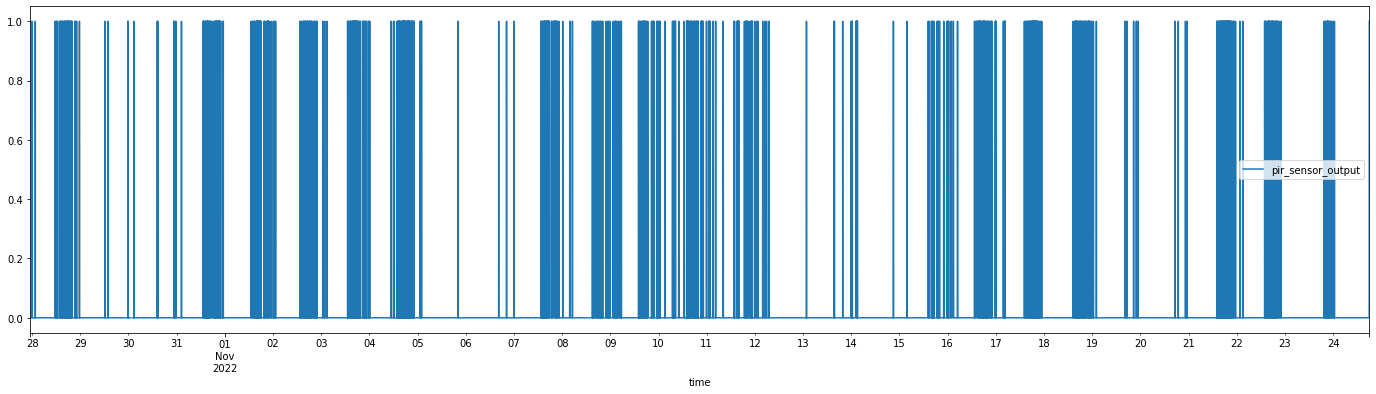

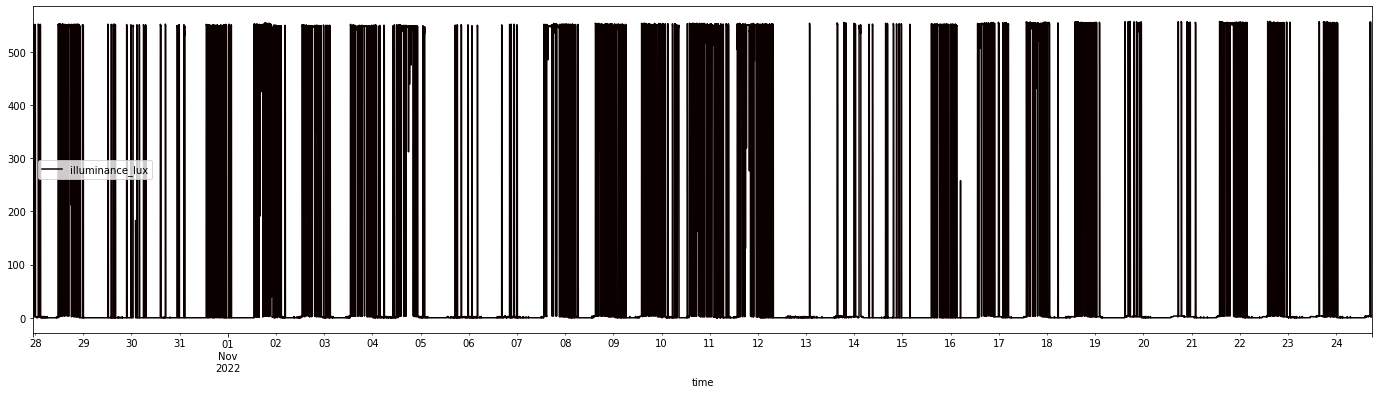

In [ ]:
pir_df_final.plot(figsize=(24, 6))
solar_df_final.plot(figsize=(24, 6), colormap='hot')

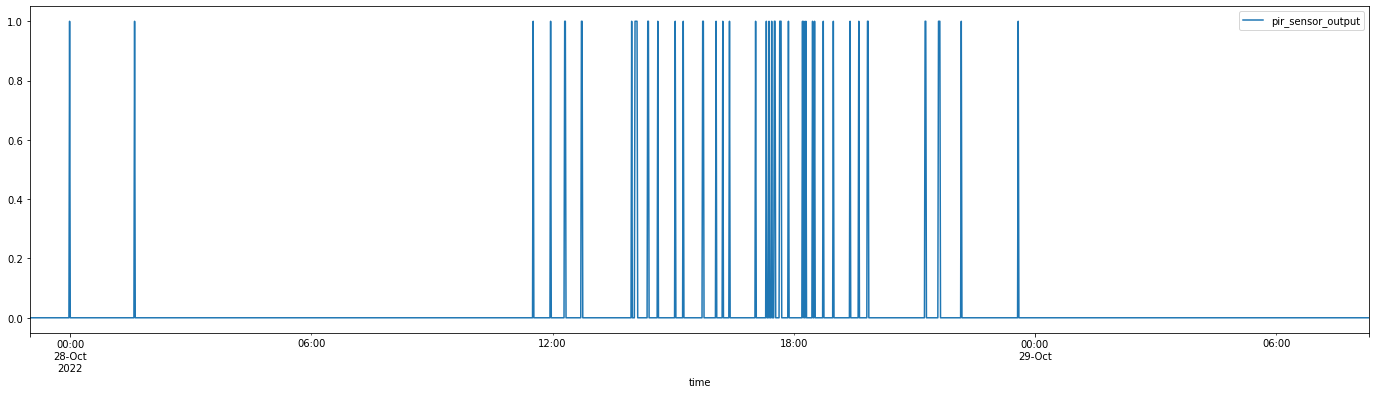

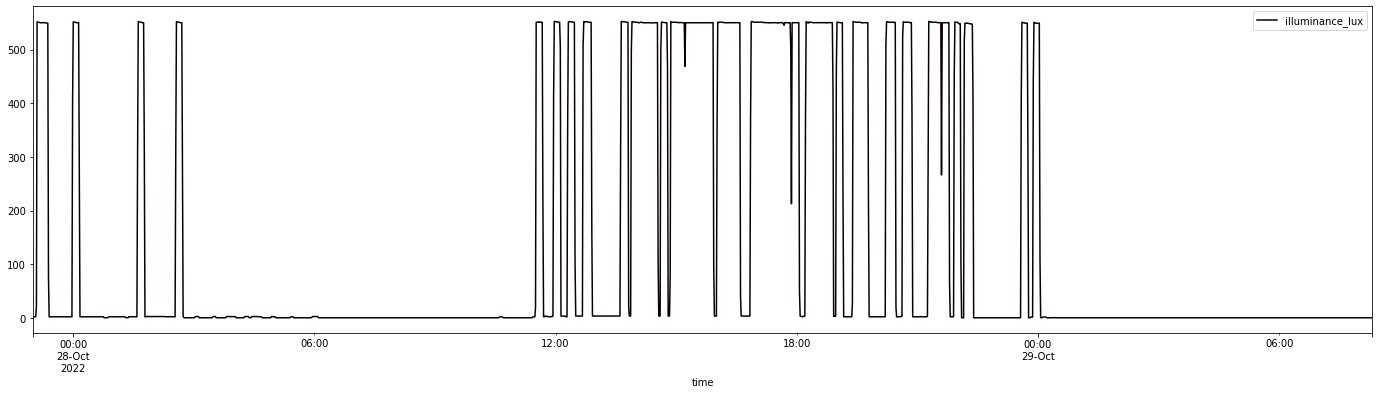

In [ ]:
pir_df_final[:2000].plot(figsize=(24, 6))
solar_df_final[:2000].plot(figsize=(24, 6), colormap='hot')

### Lux Estimation from Motion - Basic Attempt

In [ ]:
from scipy.signal import chirp, find_peaks, peak_widths

In [ ]:
x = pir_df_final['pir_sensor_output'].to_numpy().copy()
y_true = solar_df_final['illuminance_lux'].to_numpy().copy()

In [ ]:
pos = ~np.isnan(x)

x = x[pos]
y_true = y_true[pos]

pos = ~np.isnan(y_true)
x = x[pos]
y_true = y_true[pos]

x.shape, y_true.shape, np.any(np.isnan(x)), np.any(np.isnan(y_true)), np.any(np.isinf(x)), np.any(np.isinf(y_true))

((39960,), (39960,), False, False, False, False)

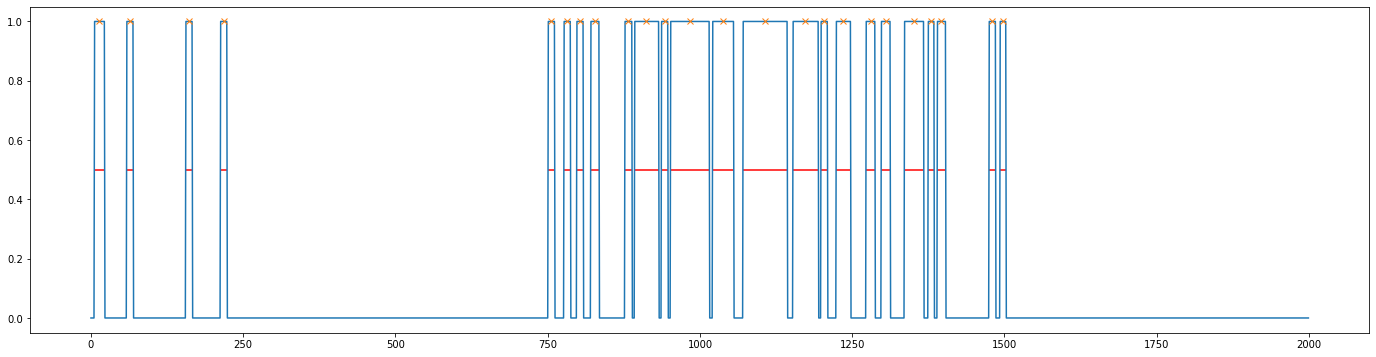

In [ ]:
yt = y_true.copy()[:2000]
ytm = yt.mean()
yt[yt>=ytm]=ytm
yt[yt<ytm]=0
yt /= yt.max()

peaks, _ = find_peaks(yt)
results = peak_widths(yt, peaks, rel_height=0.5) # widths, width_heights, left_ips, right_ips
plt.figure(figsize=(24,6))
plt.plot(yt)
plt.plot(peaks, yt[peaks], "x")
plt.hlines(*results[1:], color="r")
plt.show()

In [ ]:
yt = y_true.copy()
ytm = yt.mean()
yt[yt>=ytm]=ytm
yt[yt<ytm]=0
yt /= yt.max()

peaks, _ = find_peaks(yt)
results = peak_widths(yt, peaks, rel_height=0.5) # widths, width_heights, left_ips, right_ips
widths = results[0]

MEAN_PEAK = y_true[peaks].mean()
# WIDTH_FACTOR = widths.mean()
WIDTH_FACTOR = np.quantile(widths, 0.25)

MEAN_PEAK, WIDTH_FACTOR

(547.9863570231471, 11.0)

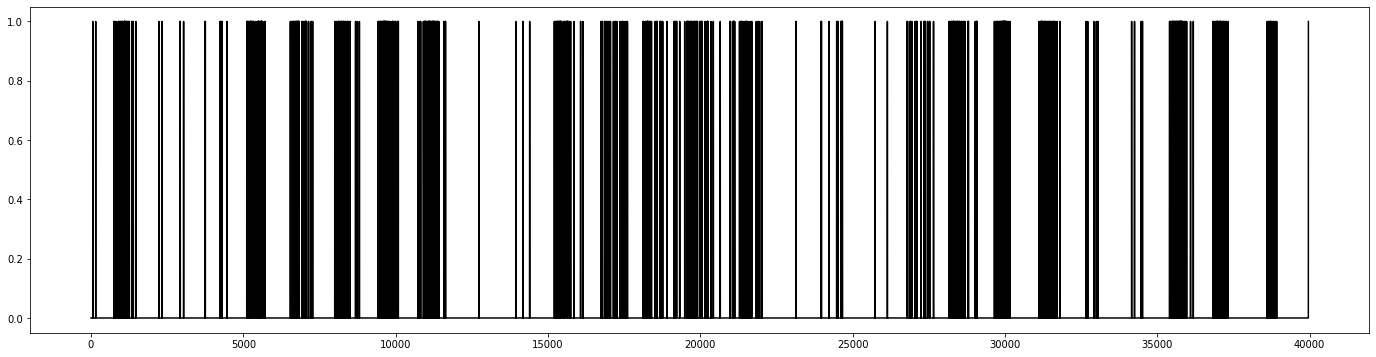

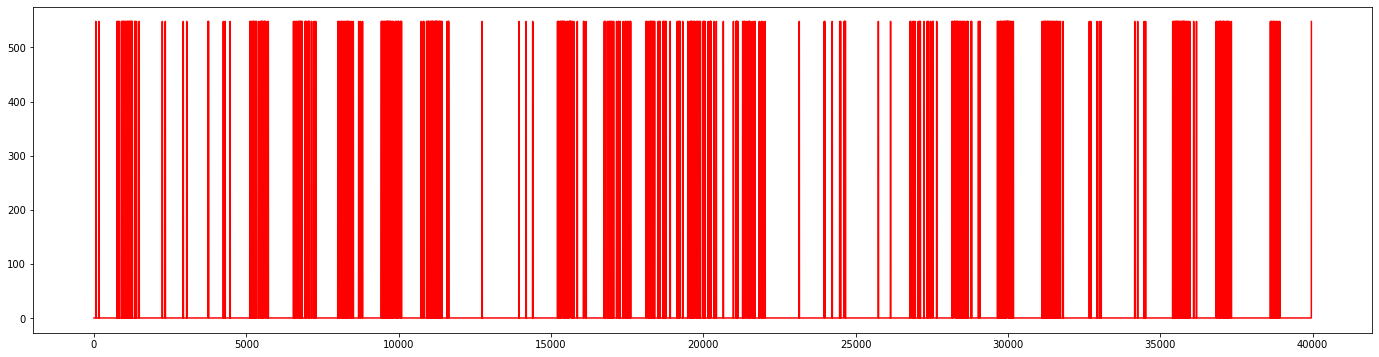

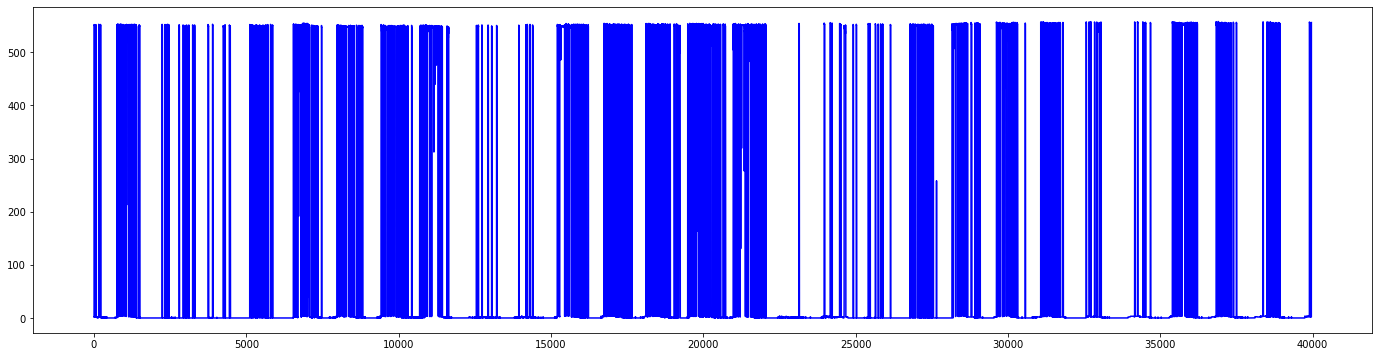

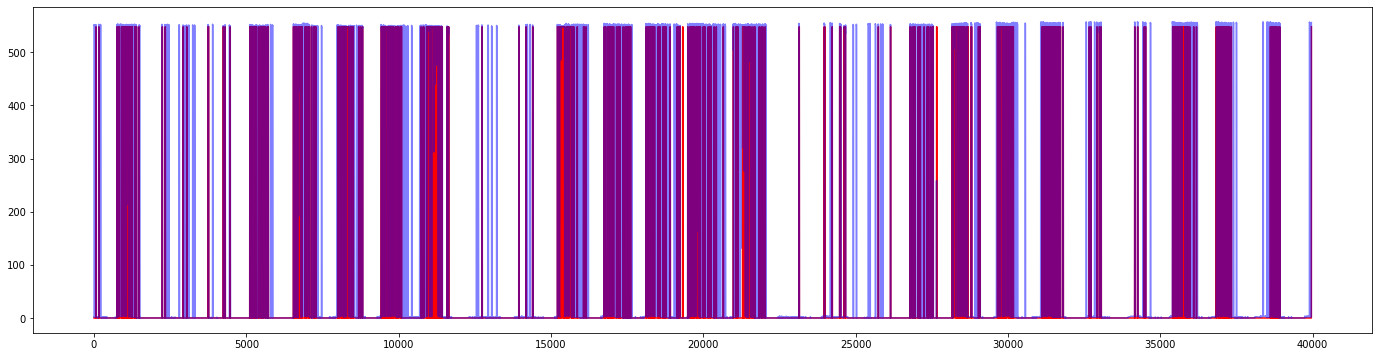

In [ ]:
y = x.copy()
w = int(WIDTH_FACTOR)

i = 0
while i < y.shape[0]:
    if y[i] > 0:
        y[i:i+w] = MEAN_PEAK
        i += w
    i += 1

plt.figure(figsize=(24,6))
plt.plot(x, 'k')
plt.show()
plt.figure(figsize=(24,6))
plt.plot(y, 'r')
plt.show()
plt.figure(figsize=(24,6))
plt.plot(y_true, 'b')
plt.figure(figsize=(24,6))
plt.plot(y, 'r')
plt.plot(y_true, 'b', alpha=0.5)

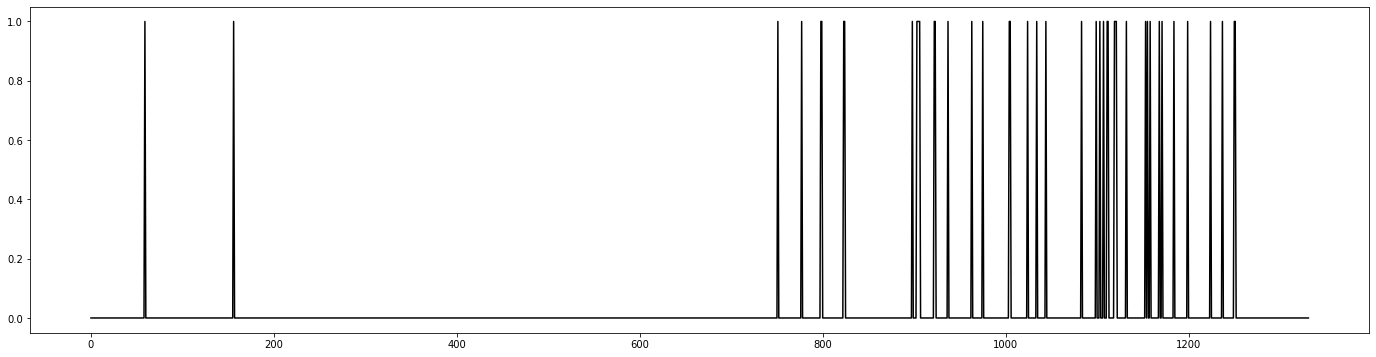

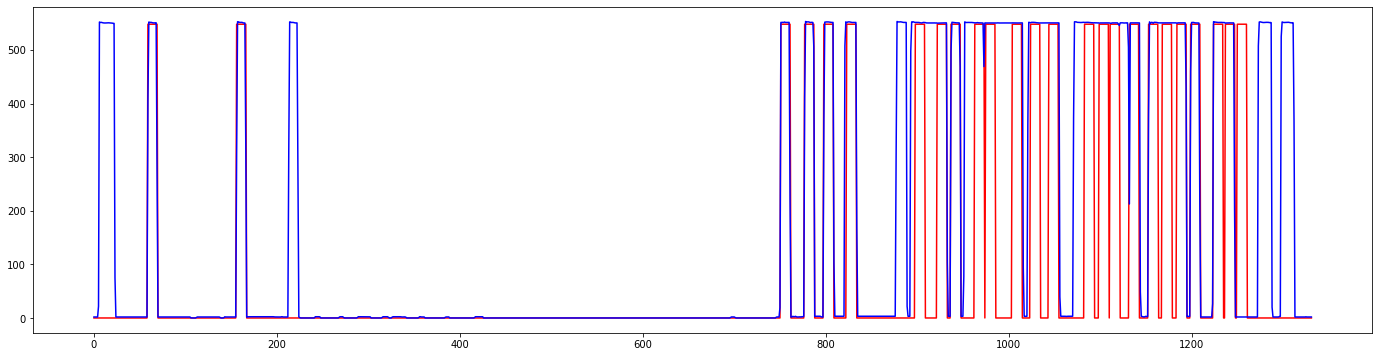

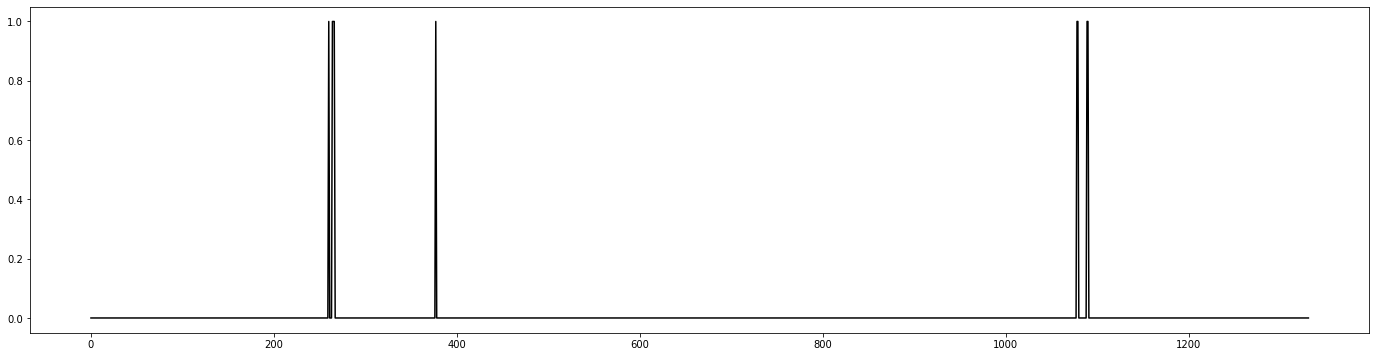

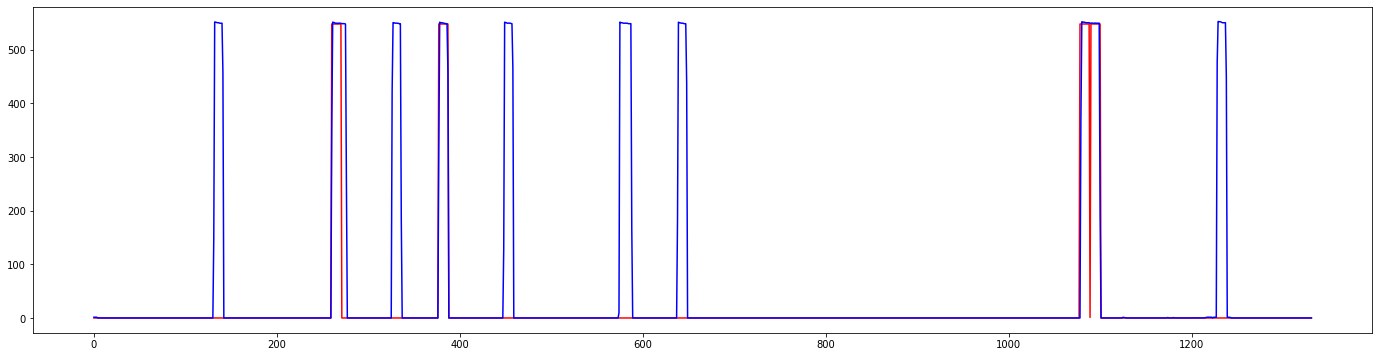

In [ ]:
N = x.shape[0]//30

plt.figure(figsize=(24,6))
plt.plot(x[:N], 'k')
plt.show()
plt.figure(figsize=(24,6))
plt.plot(y[:N], 'r')
plt.plot(y_true[:N], 'b')
plt.show()

plt.figure(figsize=(24,6))
plt.plot(x[N*2:N*3], 'k')
plt.show()
plt.figure(figsize=(24,6))
plt.plot(y[N*2:N*3], 'r')
plt.plot(y_true[N*2:N*3], 'b')

In [ ]:
!pip install tslearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 875 kB 2.5 MB/s 


In [ ]:
from tslearn.metrics import dtw
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error


def calc_correlation(actual, predic):
    a_diff = actual - np.mean(actual)
    p_diff = predic - np.mean(predic)
    numerator = np.sum(a_diff * p_diff)
    denominator = np.sqrt(np.sum(a_diff ** 2)) * np.sqrt(np.sum(p_diff ** 2))
    return numerator / denominator

In [ ]:
norm = y_true.max()
print('mse, mape, corr=', mean_squared_error(y_true/norm, y/norm), mean_absolute_percentage_error(y_true/norm, y/norm), calc_correlation(y_true/norm, y/norm))
# dtw(y_true, y)

mse, mape, corr= 0.11453977583770224 4538090222100.101 0.6509375623823193


### ML attempts

Decide trial length e.g. 600s (10 minutes) for training and prediction

In [ ]:
trial_len = 60 # minutes
N = x.shape[0] // trial_len
x_all = x[:N*trial_len]
y_all = y_true[:N*trial_len]
print(N)


x_data = np.array(np.split(x_all, N))
y_data = np.array(np.split(y_all, N))

T_half = trial_len//2

x_data2 = np.array(np.split(x_all[T_half:-T_half], N-1))
y_data2 = np.array(np.split(y_all[T_half:-T_half], N-1))

x_data = np.concatenate([x_data, x_data2])
y_data = np.concatenate([y_data, y_data2])

print(x_data.shape, y_data.shape)

# remove zero activity straight lines, they don't contribute much?
non_zero_pos = x_data.mean(axis=1) > 0
x_data = x_data[non_zero_pos]
y_data = y_data[non_zero_pos]

print(x_data.shape, y_data.shape)

from sklearn.preprocessing import MinMaxScaler
x_data = MinMaxScaler().fit_transform(x_data)
y_data = MinMaxScaler().fit_transform(y_data)
x_data.max(), x_data.min(), y_data.max(), y_data.min()

666
(1331, 60) (1331, 60)
(507, 60) (507, 60)


(1.0, 0.0, 1.0, 0.0)

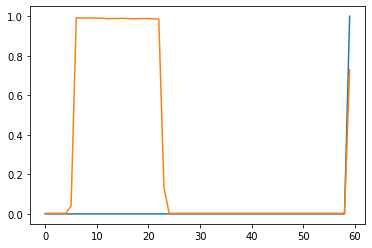

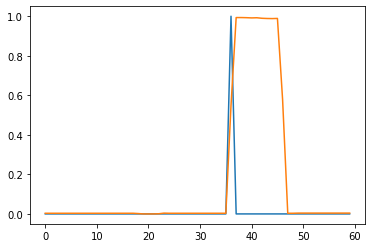

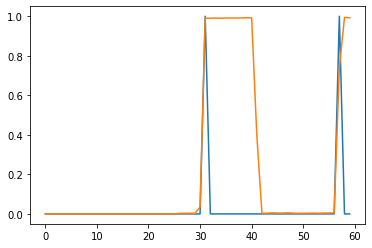

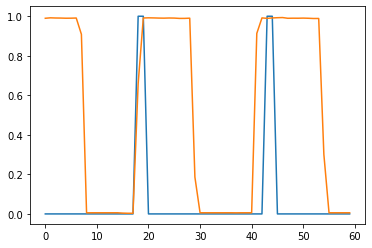

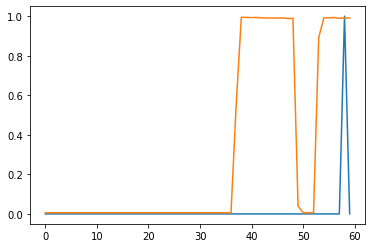

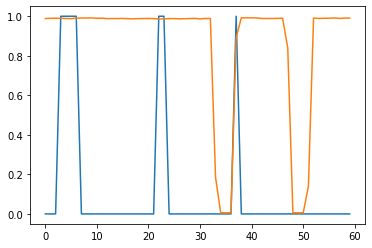

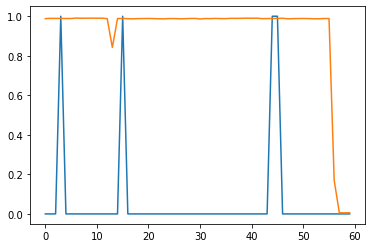

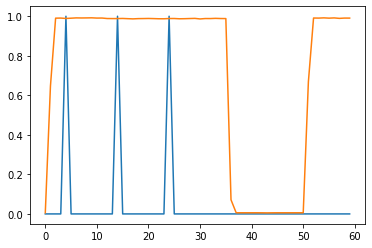

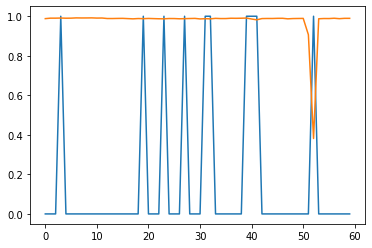

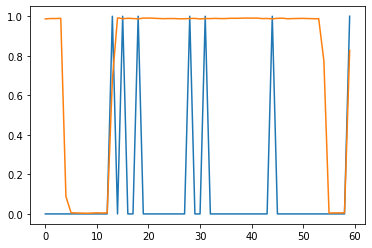

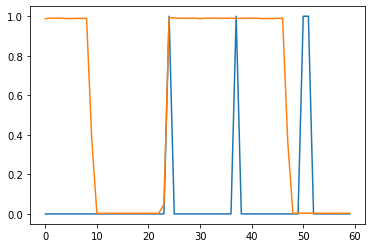

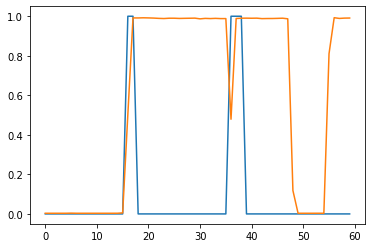

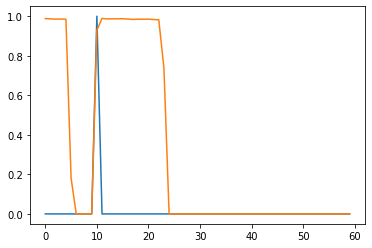

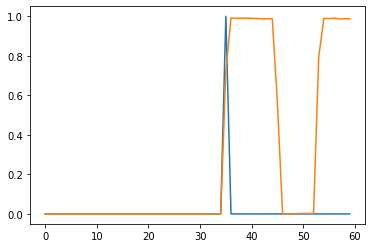

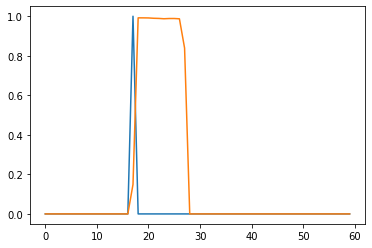

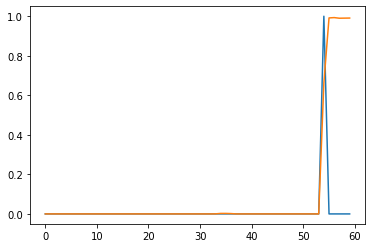

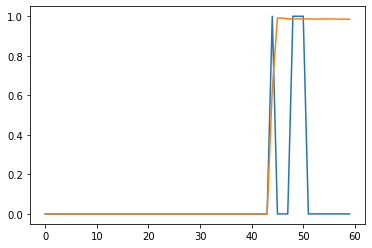

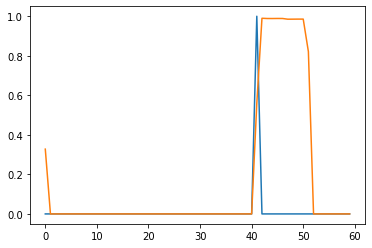

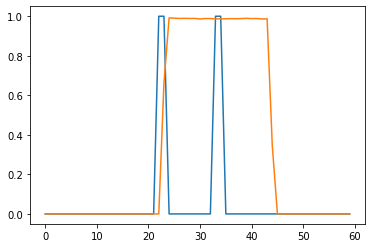

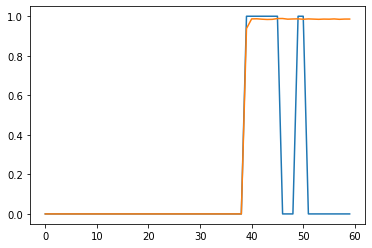

In [ ]:
for i in range(20):
    plt.plot(x_data[i])
    plt.plot(y_data[i])
    plt.show()

In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Bidirectional
from keras.layers import TimeDistributed
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.models import load_model
from sklearn.model_selection import KFold
from keras.utils.vis_utils import plot_model
from keras import regularizers
from keras import backend as K

def sigmoid(x):
  return 1/(1 + np.exp(-x))
  
def root_mean_squared_error(y_true, y_pred): # RMSE, custom, not used
    return K.sqrt(K.mean(K.square(y_pred - y_true))) 

def lstm_train(Xtr, Ytr, min_delta, patience, n_epochs, batch_size, model_save_path, cells, lr=0.001, Xvl=None, Yvl=None, it = 0, bidirectional=False, l2_reg = 0.001): #l2_reg = 1e-3): #ALSO ADD THIS BACK IN IF YOU WANT TO DO THE REGULARIZER 
    model = Sequential()
    print(Xtr.shape)
    
    if bidirectional:
        model.add(Bidirectional(LSTM(cells[0], input_shape=(Xtr.shape[1], Xtr.shape[2]), return_sequences=True))) #, kernel_initializer = 'he_uniform', kernel_regularizer = regularizers.L2(l2_reg)))
    else:
        model.add(LSTM(cells[0], input_shape=(Xtr.shape[1], Xtr.shape[2]), return_sequences=True)) #, kernel_initializer = 'he_uniform', kernel_regularizer = regularizers.L2(l2_reg)))
    
    
    if len(cells) > 1:
        if bidirectional:
            model.add(Bidirectional(LSTM(cells[1], return_sequences=True)))
        else:
            model.add(LSTM(cells[1], return_sequences=True)) # , kernel_initializer = 'he_uniform', kernel_regularizer = regularizers.L2(l2_reg)

    model.add(TimeDistributed(Dense(1)))
    opt = tf.keras.optimizers.Adam(learning_rate=lr)
    if it == 0:
        print(model.summary())
    
    loss = tf.keras.losses.MeanSquaredError()
    # loss = tf.keras.losses.CosineSimilarity()
    # loss = tf.keras.losses.Huber()
    
    model.compile(loss=loss, optimizer=opt) # loss?
    # metrics = [tf.keras.metrics.RootMeanSquaredError()] # AUC,Accuracy,RSME, MSE
    
    # Define early stopping callback
    earlystop = EarlyStopping(monitor='val_loss', min_delta=min_delta, patience=patience, verbose=1, mode='auto')
    mcp = ModelCheckpoint(model_save_path, monitor="val_loss", save_best_only=True, mode="min", save_weights_only=False)                #Return the best possible model, from: https://github.com/keras-team/keras/issues/2768
    callbacks_list = [earlystop, mcp]
    plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

    if Xvl is None:
        history = model.fit(Xtr, Ytr, epochs=n_epochs, shuffle=True)
        model.save(model_save_path)
    else:
        history = model.fit(Xtr, Ytr, epochs=n_epochs, callbacks=callbacks_list, validation_data=(Xvl, Yvl), shuffle=True, verbose = 0)
      
    return history, model    


Iteration 0
drive/MyDrive/LSTM/lstm_0.h5
(405, 60, 1)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 100)           40800     
                                                                 
 time_distributed (TimeDistr  (None, 60, 1)            101       
 ibuted)                                                         
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
13/13 [==============================] - 5s 7ms/step - loss: 0.3398
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2077
Epoch 3/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1928
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1888
Epo

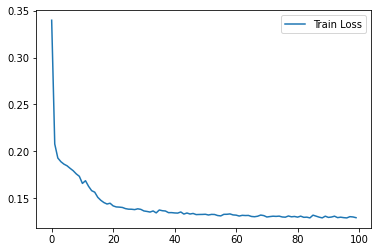

0.12910206615924835
4/4 [==============================] - 0s 4ms/step


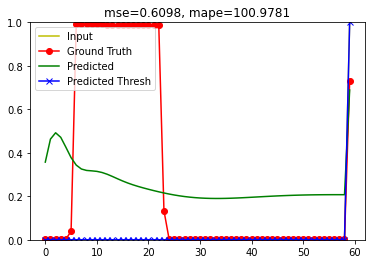

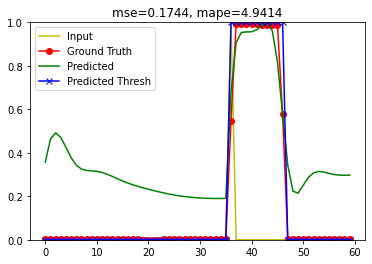

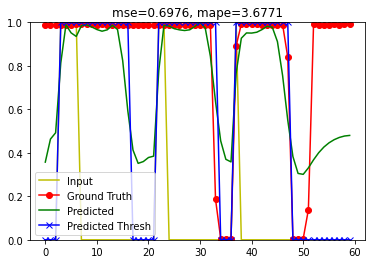

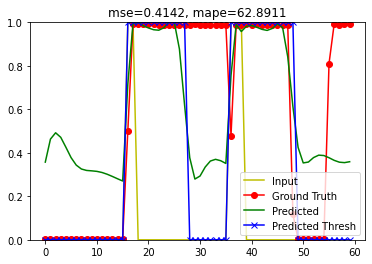

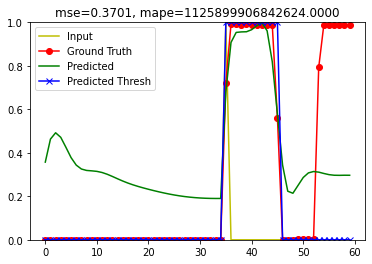

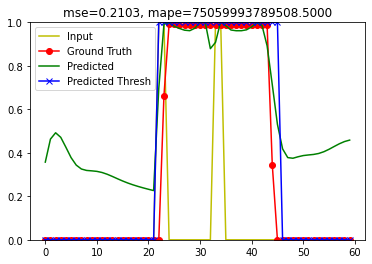

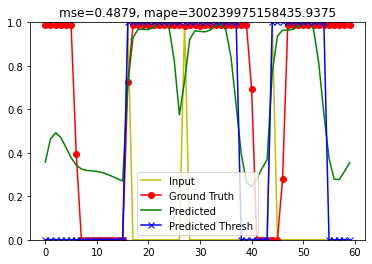

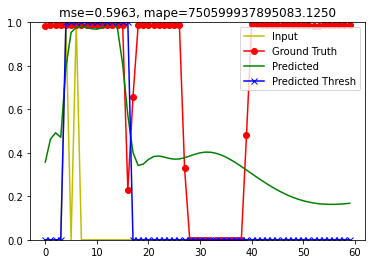

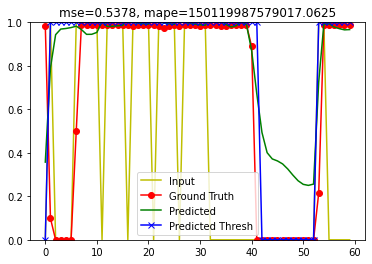

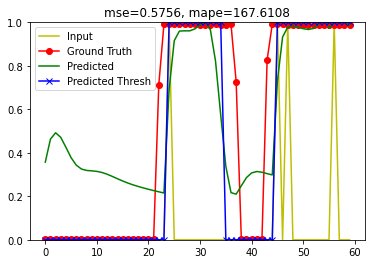

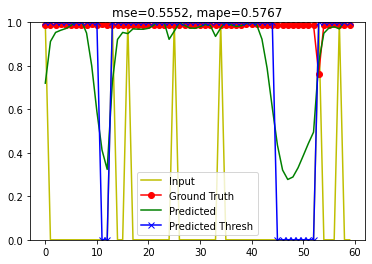

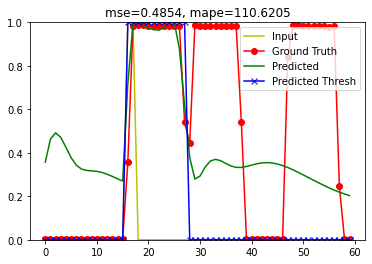

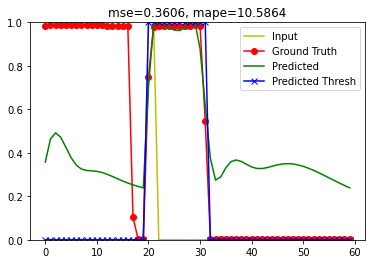

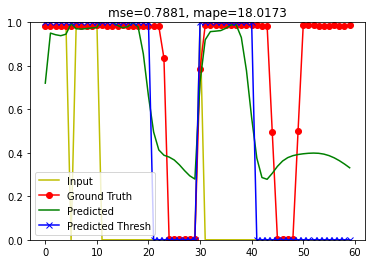

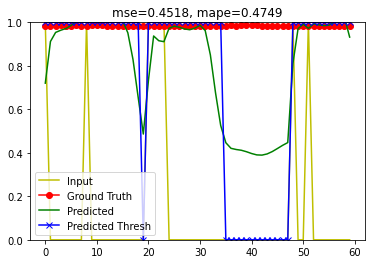

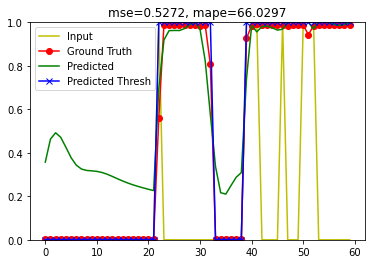

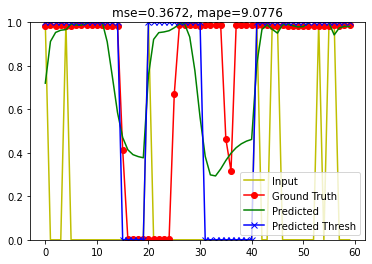

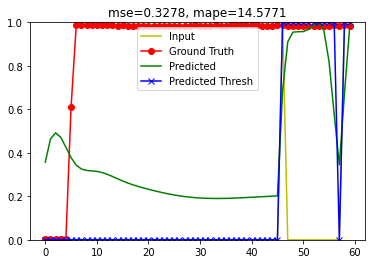

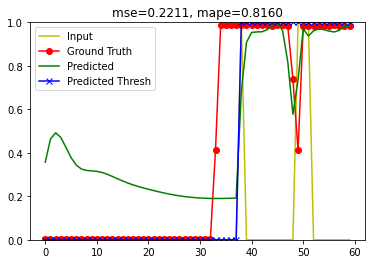

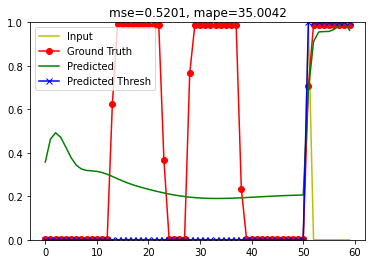

avg_mse=0.4461, avg_mape=125835871941253.6875
Iteration 1
drive/MyDrive/LSTM/lstm_1.h5
(405, 60, 1)
Epoch 1/100
13/13 [==============================] - 2s 8ms/step - loss: 0.3505
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2135
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.1936
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1872
Epoch 5/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1858
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1837
Epoch 7/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1820
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1801
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1776
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1755
Epoch 11/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1733
Epoch 12/100
13/13

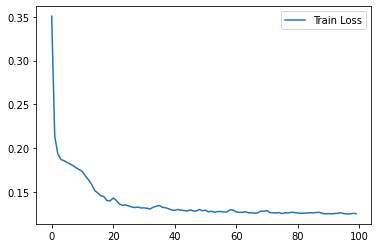

0.12536826729774475
4/4 [==============================] - 0s 5ms/step


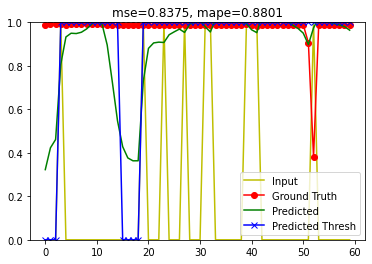

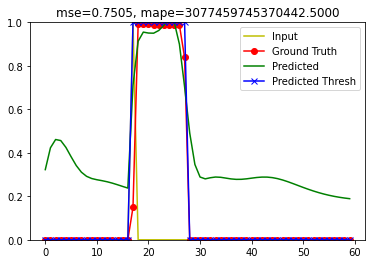

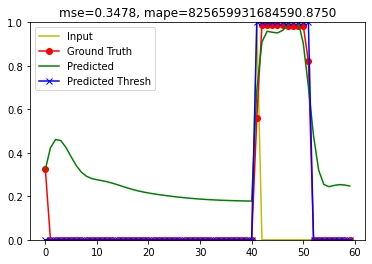

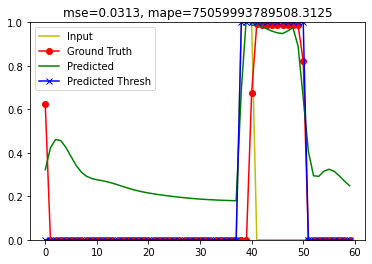

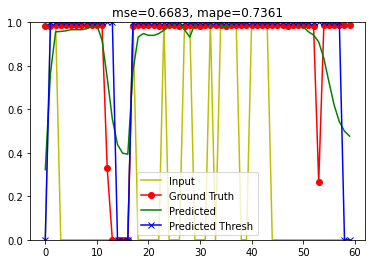

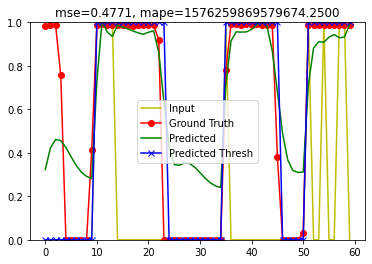

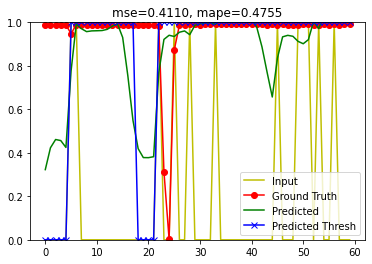

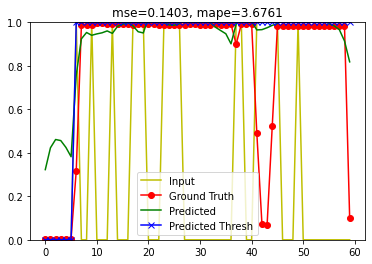

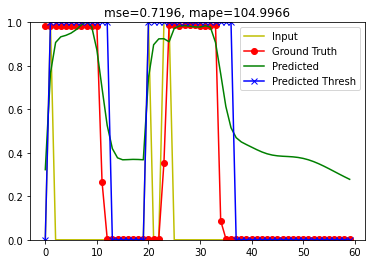

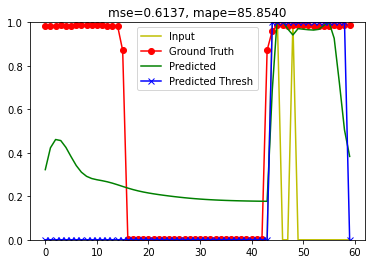

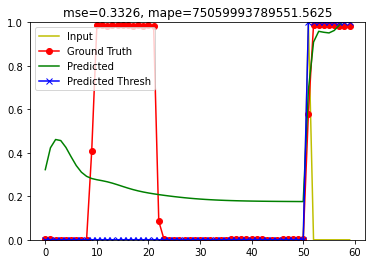

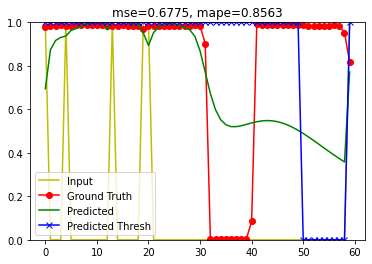

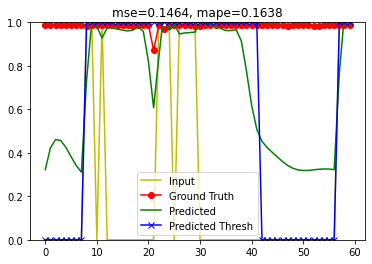

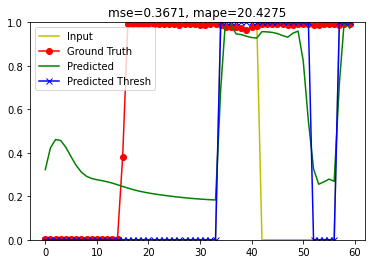

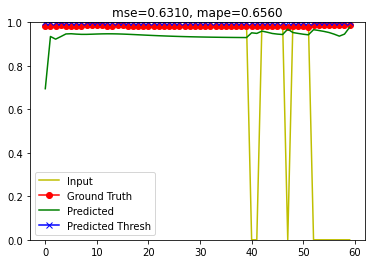

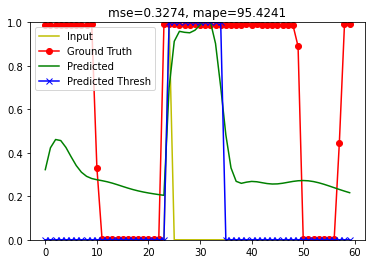

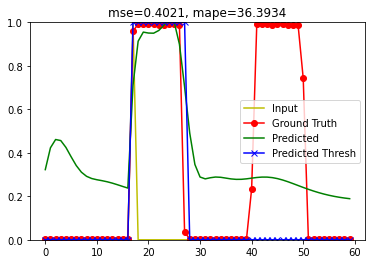

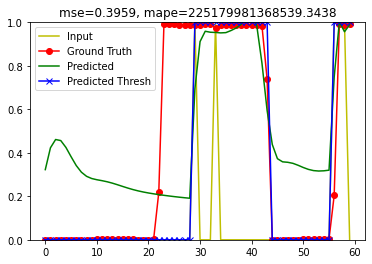

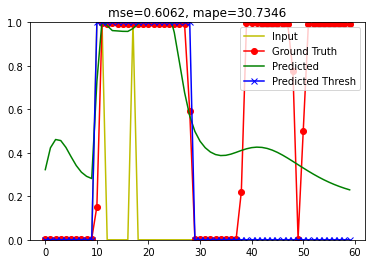

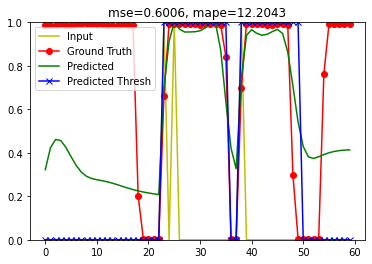

avg_mse=0.5051, avg_mape=239897627209649.2500
Iteration 2
drive/MyDrive/LSTM/lstm_2.h5
(406, 60, 1)
Epoch 1/100
13/13 [==============================] - 2s 8ms/step - loss: 0.3463
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2071
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1935
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1895
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1875
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1861
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1835
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1808
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1767
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1748
Epoch 11/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1678
Epoch 12/100
13/13

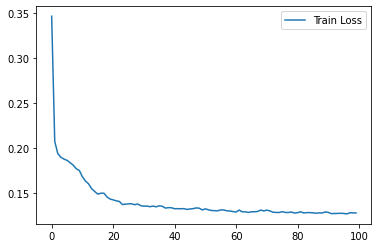

0.12759985029697418
4/4 [==============================] - 0s 7ms/step


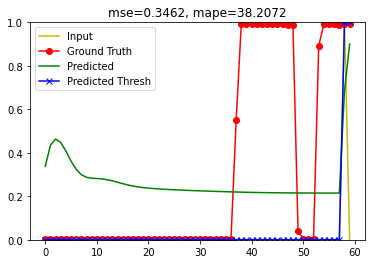

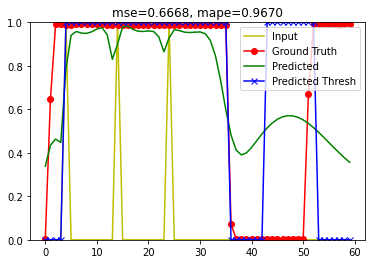

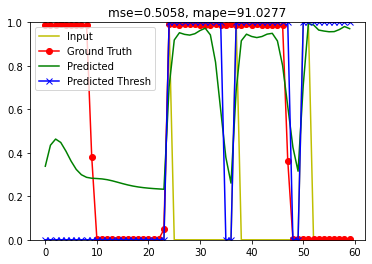

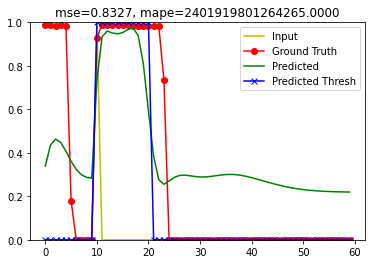

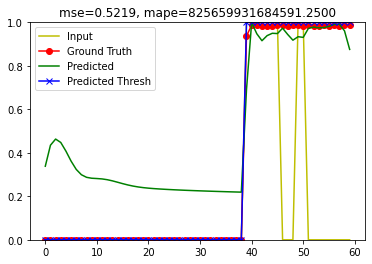

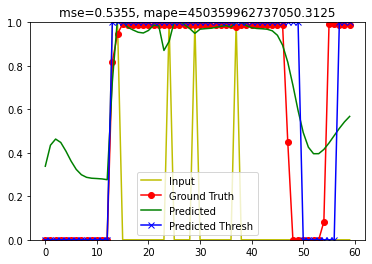

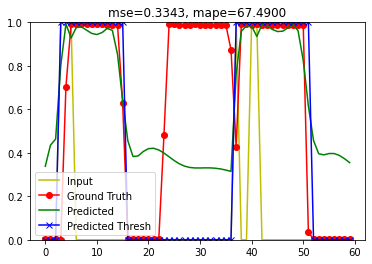

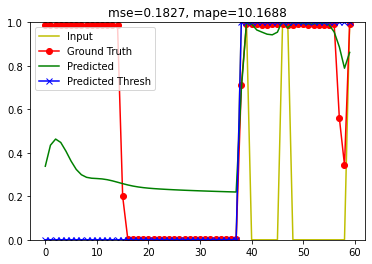

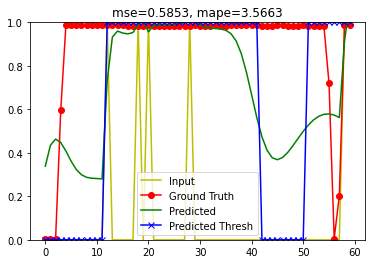

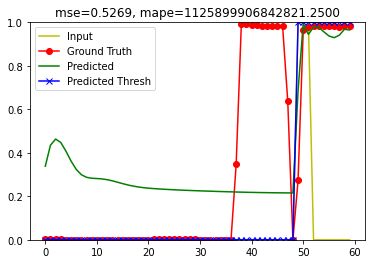

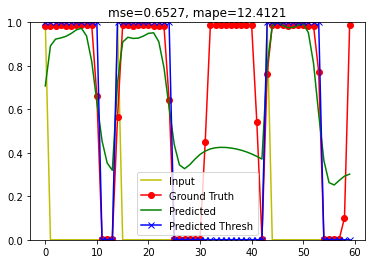

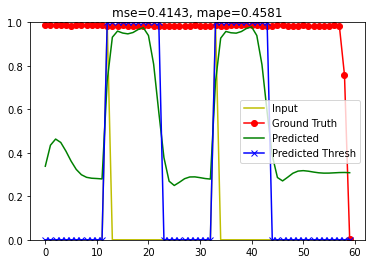

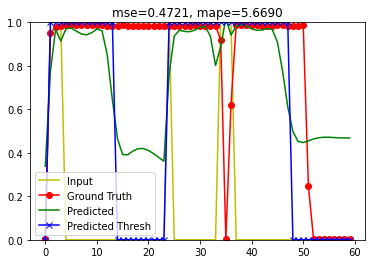

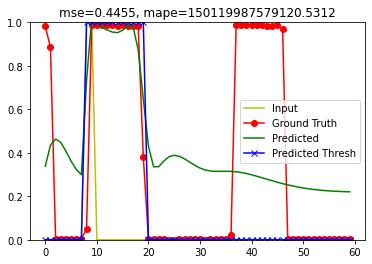

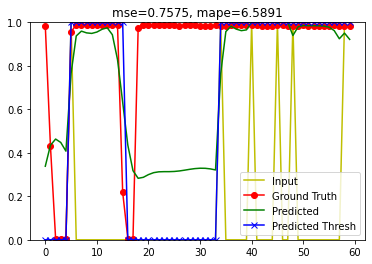

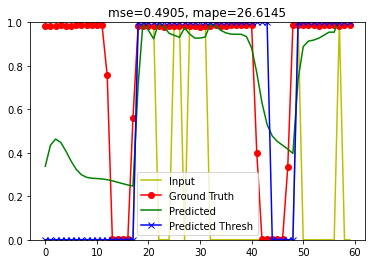

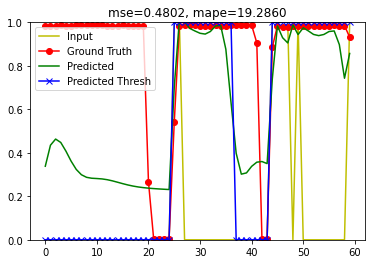

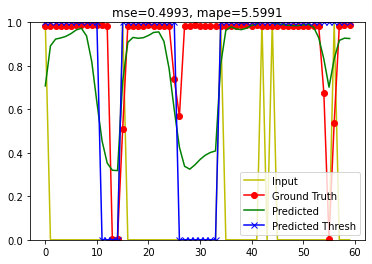

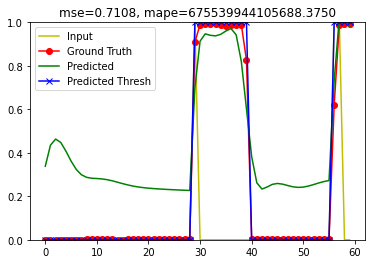

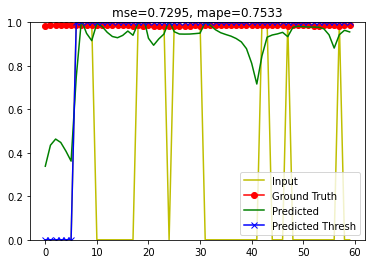

avg_mse=0.4761, avg_mape=518731442228569.2500
Iteration 3
drive/MyDrive/LSTM/lstm_3.h5
(406, 60, 1)
Epoch 1/100
13/13 [==============================] - 2s 9ms/step - loss: 0.3886
Epoch 2/100
13/13 [==============================] - 0s 9ms/step - loss: 0.2115
Epoch 3/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1939
Epoch 4/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1896
Epoch 5/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1883
Epoch 6/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1864
Epoch 7/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1823
Epoch 8/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1788
Epoch 9/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1759
Epoch 10/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1707
Epoch 11/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1673
Epoch 12/100
13/13

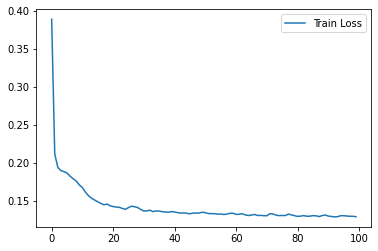

0.12899264693260193
4/4 [==============================] - 0s 8ms/step


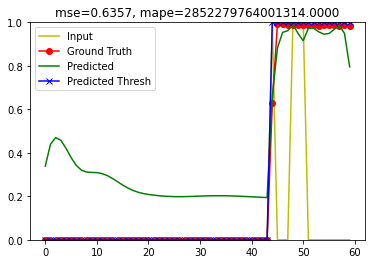

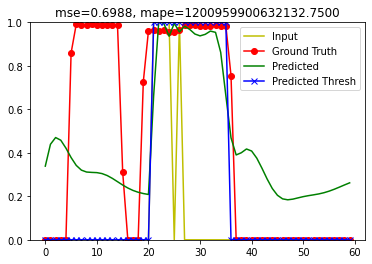

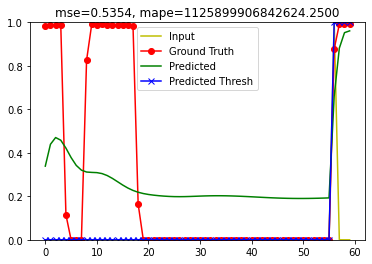

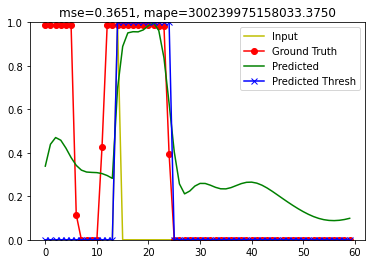

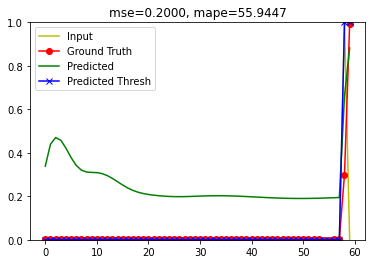

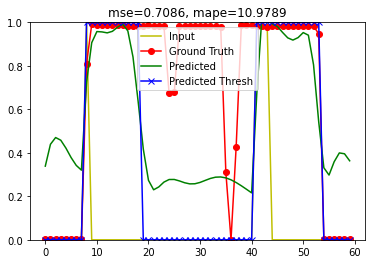

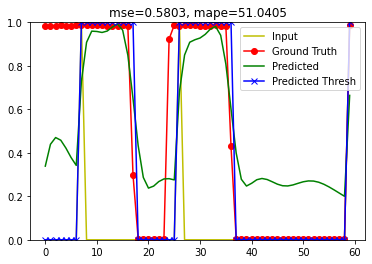

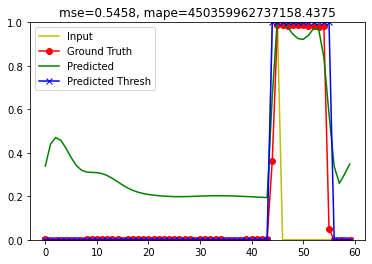

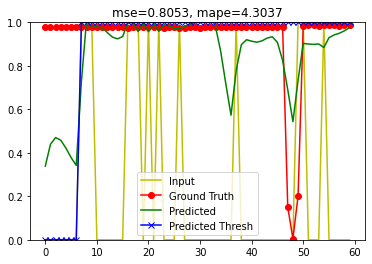

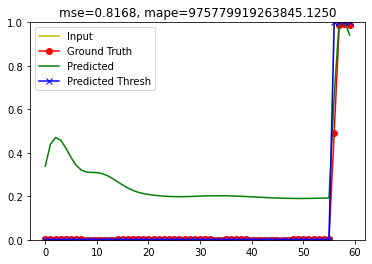

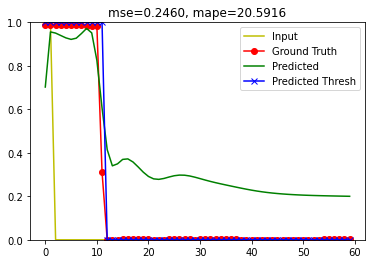

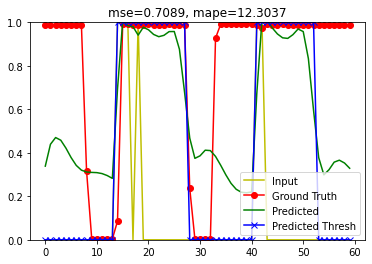

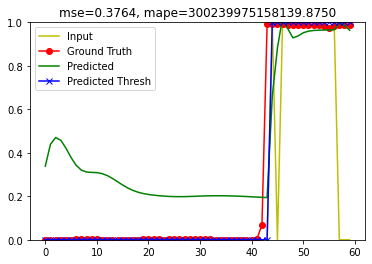

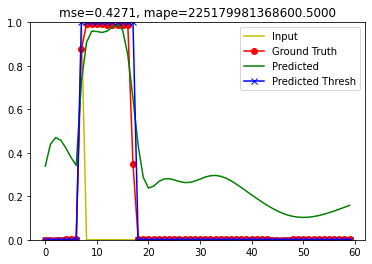

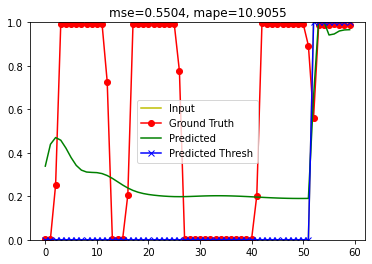

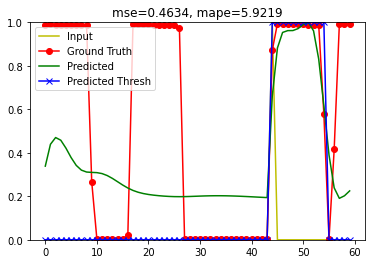

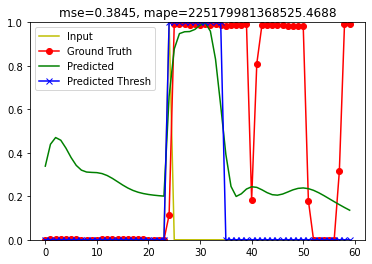

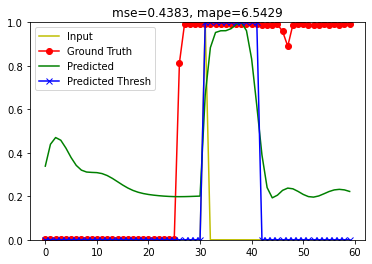

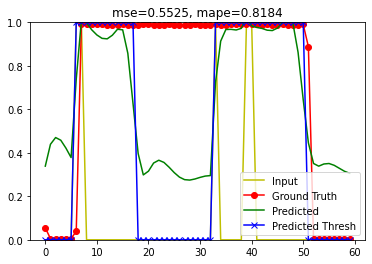

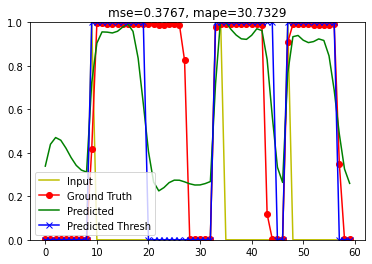

avg_mse=0.4845, avg_mape=345573238733929.1875
Iteration 4
drive/MyDrive/LSTM/lstm_4.h5
(406, 60, 1)
Epoch 1/100
13/13 [==============================] - 2s 10ms/step - loss: 0.3512
Epoch 2/100
13/13 [==============================] - 0s 8ms/step - loss: 0.2073
Epoch 3/100
13/13 [==============================] - 0s 9ms/step - loss: 0.1894
Epoch 4/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1862
Epoch 5/100
13/13 [==============================] - 0s 9ms/step - loss: 0.1837
Epoch 6/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1815
Epoch 7/100
13/13 [==============================] - 0s 9ms/step - loss: 0.1788
Epoch 8/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1758
Epoch 9/100
13/13 [==============================] - 0s 8ms/step - loss: 0.1715
Epoch 10/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1661
Epoch 11/100
13/13 [==============================] - 0s 7ms/step - loss: 0.1607
Epoch 12/100
13/1

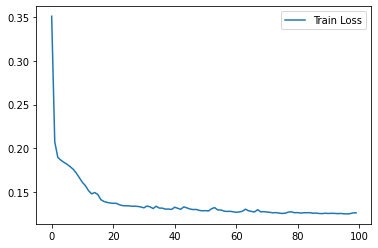

0.12581989169120789
4/4 [==============================] - 1s 5ms/step


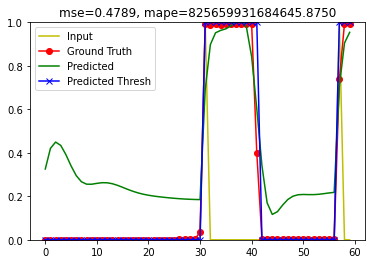

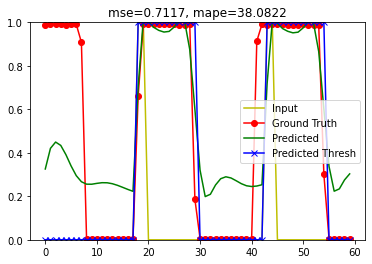

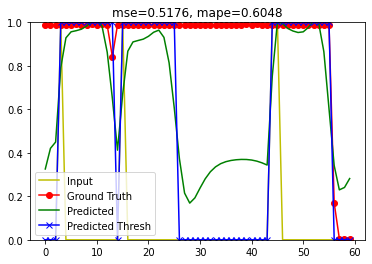

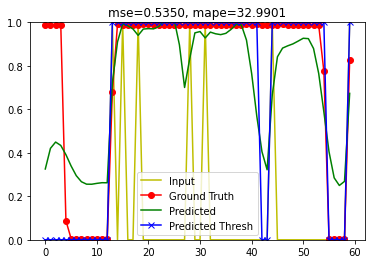

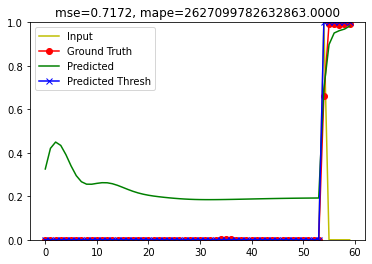

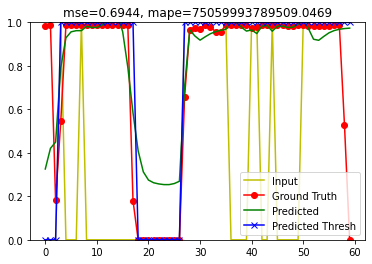

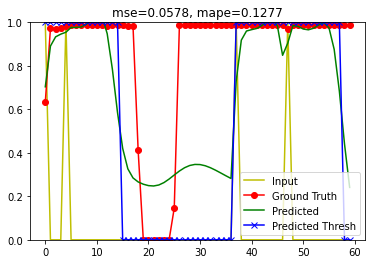

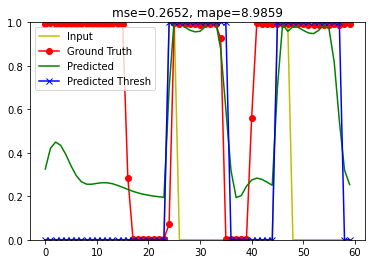

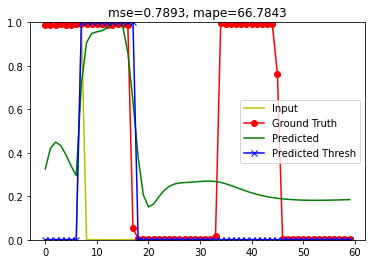

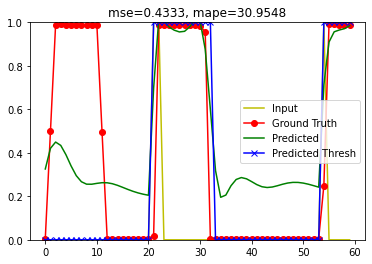

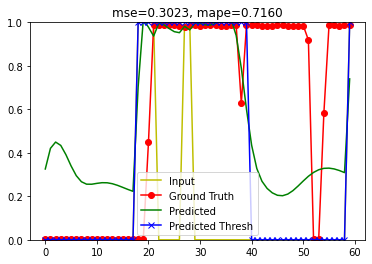

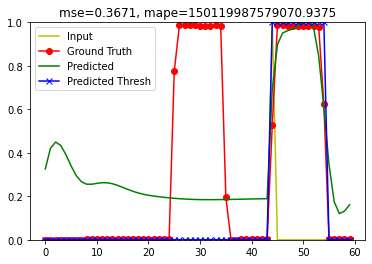

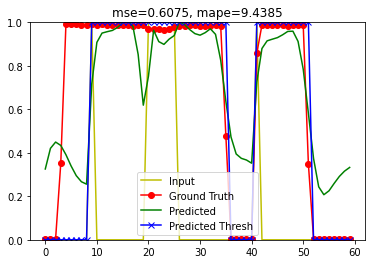

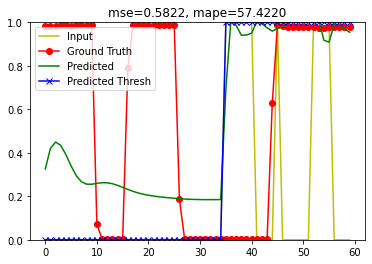

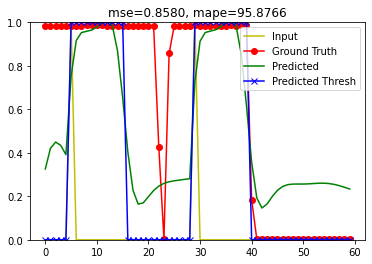

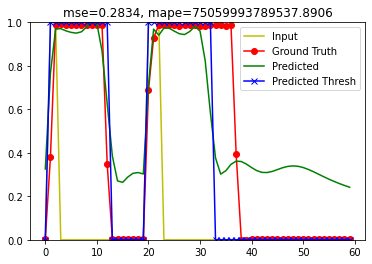

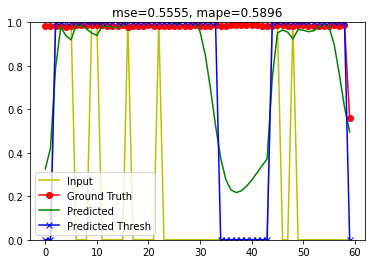

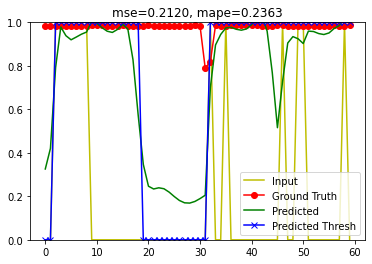

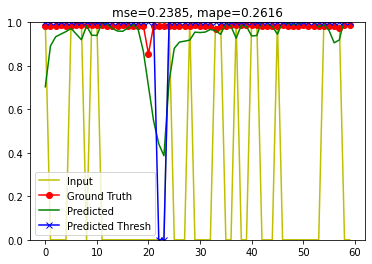

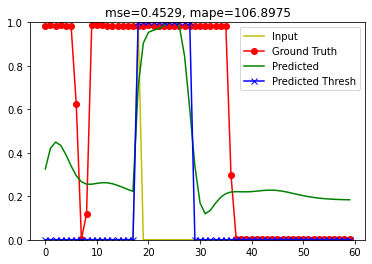

avg_mse=0.5273, avg_mape=122622762131392.3594
IT loss mean +- std:  0.1273765444755554 +- 0.0015553406595584054
       0         1         2
0  [100]  0.127377  0.001555


In [ ]:
loss_tr = list()
loss_vl = list()
metrics = list()
save_path = 'drive/MyDrive/LSTM'

min_delta = 0.0001  
patience = 50       
n = N
batch_size = 16
k = 5

# change these mainly
n_epochs = 100
lr = 1e-3

# for cells in [[10], [20], [50], [100], [200], [500], [1000], [50, 20], [75, 30], [100, 50], [500, 100]]:
for cells in [[100]]:
    iter = 0
    it_losses = list()
    kfold = KFold(n_splits=k, shuffle=True)

    for train, test in kfold.split(x_data, y_data):
        print('Iteration', iter)
        Xtr, Xte, Ytr, Yte = x_data[train], x_data[test], y_data[train], y_data[test]
        Xtr = np.expand_dims(Xtr, -1)
        Xte = np.expand_dims(Xte, -1)
        Ytr = np.expand_dims(Ytr, -1)
        Yte = np.expand_dims(Yte, -1)
        
        # #Clear the last session from memory
        K.clear_session()
        
        # Train the LSTM model
        model_save_path = save_path + '/lstm_' + str(iter) + '.h5'
        print(model_save_path)

        history, model = lstm_train(Xtr, Ytr, min_delta, patience, n_epochs, batch_size, model_save_path, cells, lr, it = iter)

        # #Save the training and validation loss for each iteration.
        tr_l = history.history['loss']
        vl_l = None
        
        plt.plot(tr_l, label='Train Loss')
        plt.legend()
        plt.show()
        
        loss_tr.append(tr_l)
        it_losses.append(tr_l[-1])
        print(tr_l[-1])

        #Make predictions and invert them
        Yte_predict = model.predict(Xte)

        # with open(save_path + '/pred_data_'+str(iter)+'.pkl', 'wb') as f: 
        #     pickle.dump([Xte, Yte, Yte_predict, time, tr_l, vl_l], f)  
        
        mses = []
        mapes = []

        for j in range(Yte.shape[0]):
            mse = mean_squared_error(Yte[j], ypred)
            mape = mean_absolute_percentage_error(Yte[j], ypred)
            mses.append(mse)
            mapes.append(mape)
            
            if j < 20: # show 20
                plt.plot(Xte[j], 'y-', label='Input')
                plt.plot(Yte[j], 'ro-', label='Ground Truth')
                ypred = Yte_predict[j] 
                plt.plot(ypred, 'g-', label='Predicted')
                ypred[ypred>=0.5]=1
                ypred[ypred<0.5]=0
                plt.plot(ypred, 'bx-', label='Predicted Thresh')
                plt.title(f'mse={mse:.4f}, mape={mape:.4f}')
                plt.legend()
                plt.ylim(0,1)
                plt.show()

        avg_mse = np.array(mses).mean()
        avg_mape = np.array(mapes).mean()
        print(f'avg_mse={avg_mse:.4f}, avg_mape={avg_mape:.4f}')
        
        iter+=1

    it_losses = np.array(it_losses)
    metrics.append([cells, it_losses.mean(), it_losses.std()])
    print('IT loss mean +- std: ', it_losses.mean(), '+-', it_losses.std())

df_metrics = pd.DataFrame(metrics)
print(df_metrics)

df_metrics.to_csv(os.path.join(DIR,'df_metrics_lstm.csv'))
#%% Save other variables  

### More experiments

In [ ]:
!pip install keras_nlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 151 kB 5.1 MB/s 
     |████████████████████████████████| 5.8 MB 47.6 MB/s 
     |████████████████████████████████| 588.3 MB 23 kB/s 
INFO: pip is looking at multiple versions of tensorflow-text to determine which version is compatible with other requirements. This could take a while.
     |████████████████████████████████| 5.9 MB 49.2 MB/s 
     |████████████████████████████████| 578.1 MB 7.9 kB/s 
     |████████████████████████████████| 578.1 MB 7.0 kB/s 
     |████████████████████████████████| 4.6 MB 48.5 MB/s 


In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
import keras_nlp

def create_transformer_model():
    SEQ_LEN = 60
    INTERMEDIATE_DIM = 32
    NUM_HEADS = 1
    OUTPUT_SIZE = 60
    EMBED_DIM = 60

    encoder_inputs = keras.Input(shape=(SEQ_LEN,), name="encoder_inputs")

    encoder_outputs = keras_nlp.layers.TransformerEncoder(
        intermediate_dim=INTERMEDIATE_DIM, num_heads=NUM_HEADS
    )(inputs=encoder_inputs)

    encoder = keras.Model(encoder_inputs, encoder_outputs)


    decoder_inputs = keras.Input(shape=(SEQ_LEN,), name="decoder_inputs")
    encoded_seq_inputs = keras.Input(shape=(SEQ_LEN, EMBED_DIM), name="decoder_state_inputs")

    x = keras_nlp.layers.TransformerDecoder(
        intermediate_dim=INTERMEDIATE_DIM, num_heads=NUM_HEADS
    )(decoder_sequence=x, encoder_sequence=encoded_seq_inputs)

    x = keras.layers.Dropout(0.5)(x)

    decoder_outputs = keras.layers.Dense(OUTPUT_SIZE, activation="softmax")(x)
    
    decoder = keras.Model(
        [ decoder_inputs, encoded_seq_inputs],
        decoder_outputs,
    )

    decoder_outputs = decoder([decoder_inputs, encoder_outputs])

    transformer = keras.Model(
        [encoder_inputs, decoder_inputs],
        decoder_outputs,
        name="transformer",
    )

In [ ]:
transformer = create_transformer_model()
transformer.summary()

StagingError: ignored